<a href="https://colab.research.google.com/github/federicotarozzi/Corso_AnalistaProgrammatoreDatiGeoSpaziali/blob/main/3_correlation_yield_climate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yield - climate indicators correlation

#### Import the library we need

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#### Upload of the dataset

In [ ]:
indicators = pd.read_csv('Data/climate_indicators.csv.csv') # climate indicators
yield_df = pd.read_csv('Data/yield_data/yield_ita_data_def.csv') #italian tomato production from ISTAT already prepared

In [ ]:
#merge of the dataset
df = pd.merge(yield_df, indicators, on=['Province', 'Year'], how ='inner')

#save a copy on csv
df.to_csv('Data/yield_climate_data.csv', index=False)

#show the dataset
df

,Province,Year,tot_area_ha,tot_prod_q,Yield,Class,Prec_cumulate_Q3,d_prec_Q3,prec_intensity_Q3,Prec_cumulate_Q2,...,su_Q3,d_tmax>30_Q3,d_tmax>35_Q3,d_tmax>40_Q3,d_tmix<10_Q3,d_tmix<19_Q3,wave>2d_30,wave>3d_25,wave>4d_20,GGD
0,Arezzo,2006,100,40000,400.000000,2,207.1,41,5.051220,21.9,...,79,47,10.0,0.0,11.0,88,5,3,3,1398.3
1,Arezzo,2007,100,40000,400.000000,2,97.4,27,3.607407,24.0,...,79,42,13.0,0.0,18.0,88,8,6,1,1398.5
2,Arezzo,2008,450,360000,800.000000,4,87.9,30,2.930000,95.0,...,74,58,2.0,0.0,15.0,90,9,2,1,1366.6
3,Arezzo,2009,217,146667,675.884793,3,95.3,33,2.887879,74.6,...,86,57,18.0,0.0,3.0,88,5,5,1,1520.3
4,Arezzo,2010,750,450000,600.000000,3,152.8,35,4.365714,54.2,...,76,40,6.0,0.0,14.0,88,5,10,2,1354.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,Viterbo,2007,1050,874500,832.857143,4,68.5,32,2.140625,19.0,...,82,34,8.0,0.0,2.0,79,7,6,1,1458.8
472,Viterbo,2008,1030,880500,854.854369,4,59.3,31,1.912903,54.4,...,74,59,2.0,0.0,10.0,88,6,1,2,1385.9
473,Viterbo,2009,1070,995100,930.000000,4,92.7,28,3.310714,103.6,...,87,46,3.0,0.0,0.0,80,5,6,1,1547.6
474,Viterbo,2010,1050,945000,900.000000,4,87.9,30,2.930000,48.7,...,81,41,2.0,0.0,3.0,74,4,6,2,1452.6


In [ ]:
#check the columns we have
df.columns

Index(['Province', 'Year', 'tot_area_ha', 'tot_prod_q', 'Yield', 'Class',
       'Prec_cumulate_Q3', 'd_prec_Q3', 'prec_intensity_Q3',
       'Prec_cumulate_Q2', 'd_prec_Q2', 'prec_intensity_Q2',
       'Prec_cumulate_tot', 'd_prec_tot', 'prec_intensity_tot', 'tr_tot',
       'su_tot', 'd tmax>30_tot', 'd tmax>35_tot', 'd tmax>40_tot',
       'd tmix<10_tot', 'd tmix<19_tot', 'tr_Q2', 'su_Q2', 'd_tmax>30_Q2',
       'd_tmax>35_Q2', 'd_tmax>40_Q2', 'd_tmix<10_Q2', 'd_tmix<19_Q2', 'tr_Q3',
       'su_Q3', 'd_tmax>30_Q3', 'd_tmax>35_Q3', 'd_tmax>40_Q3', 'd_tmix<10_Q3',
       'd_tmix<19_Q3', 'wave>2d_30', 'wave>3d_25', 'wave>4d_20', 'GGD'],
      dtype='object')

In [ ]:
# Check what and how many provinces we have
print('Total number of provinces is: ', df['Province'].nunique())
print("Provinces' names: ", df['Province'].unique())

Total number of provinces is:  39
Provinces' names:  ['Arezzo' 'Bari' 'Barletta' 'Benevento' 'Bologna' 'Brescia' 'Brindisi'
 'Caltanissetta' 'Caserta' 'Cremona' 'Ferrara' 'Firenze' 'Foggia'
 'Forlì-Cesena' 'Frosinone' 'Latina' 'Lecce' 'Livorno' 'Lodi' 'Mantova'
 'Massa' 'Milano' 'Modena' 'Napoli' 'Palermo' 'Parma' 'Pavia' 'Piacenza'
 'Ragusa' 'Ravenna' 'Reggio-Emilia' 'Rimini' 'Roma' 'Salerno' 'Siena'
 'Siracusa' 'Taranto' 'Trapani' 'Viterbo']


___________________________________________________________________________________________________

### Correlation graph: heatmap with seaborn
here you can find documentation: https://seaborn.pydata.org/generated/seaborn.heatmap.html

#### Yield correlation with temperature

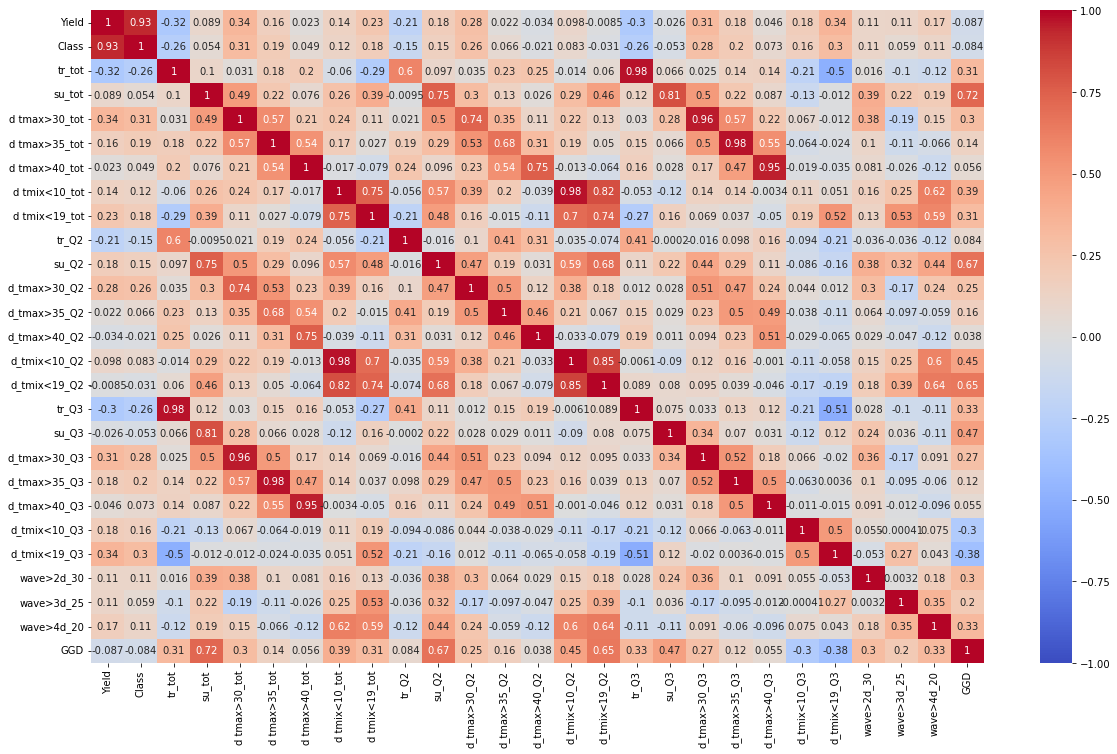

In [ ]:
temp_indicators = ['tr_tot', 'su_tot', 'd tmax>30_tot', 'd tmax>35_tot', 'd tmax>40_tot', 'd tmix<10_tot', 'd tmix<19_tot',
                   'tr_Q2', 'su_Q2', 'd_tmax>30_Q2', 'd_tmax>35_Q2', 'd_tmax>40_Q2', 'd_tmix<10_Q2', 'd_tmix<19_Q2',
                   'tr_Q3', 'su_Q3', 'd_tmax>30_Q3', 'd_tmax>35_Q3', 'd_tmax>40_Q3', 'd_tmix<10_Q3', 'd_tmix<19_Q3',
                   'wave>2d_30', 'wave>3d_25', 'wave>4d_20', 'GGD']
columns_for_corr = ['Yield', 'Class'] + temp_indicators

fig, p = plt.subplots(figsize=(20, 12))

df_corr = df[columns_for_corr].dropna().corr(method='pearson')
p = sns.heatmap(df_corr, annot = True, vmin= -1 , vmax= 1, cmap="coolwarm")

#### Yield correlation with precipitation

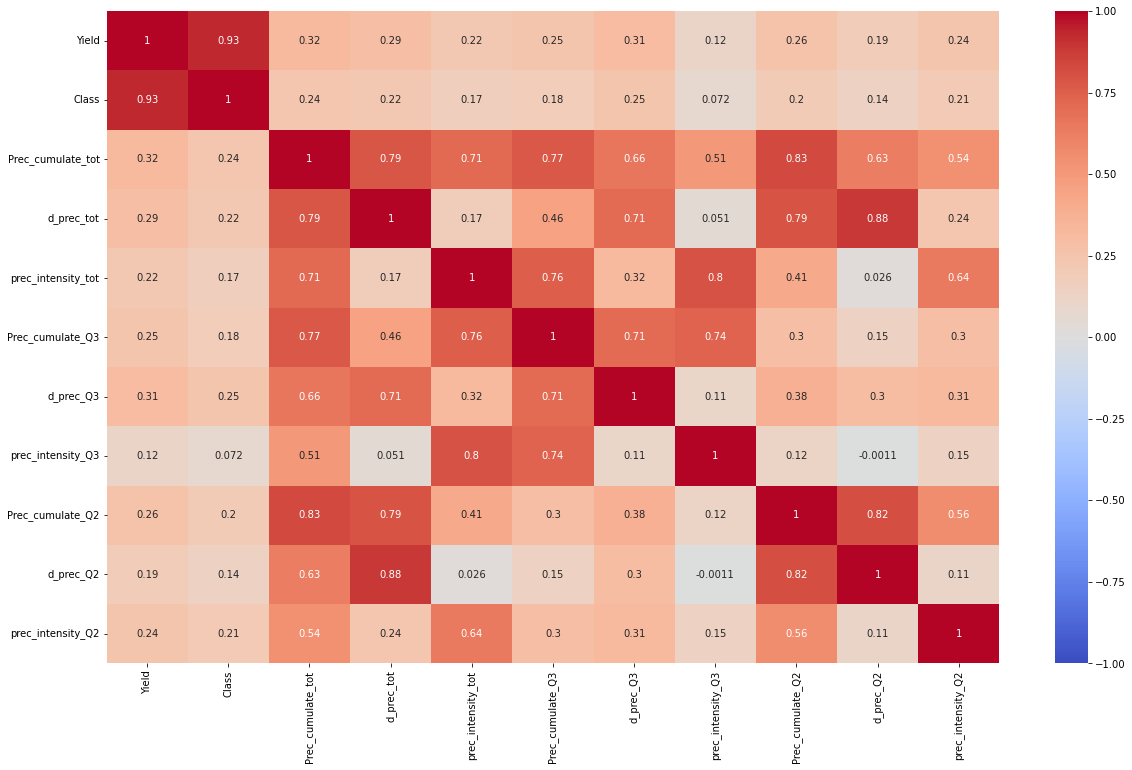

In [ ]:
prec_indicators = ['Prec_cumulate_tot', 'd_prec_tot', 'prec_intensity_tot',
                   'Prec_cumulate_Q3', 'd_prec_Q3', 'prec_intensity_Q3',
                   'Prec_cumulate_Q2', 'd_prec_Q2', 'prec_intensity_Q2',]
columns_for_corr = ['Yield', 'Class'] + prec_indicators

fig, p = plt.subplots(figsize=(20, 12))

df_corr = df[columns_for_corr].dropna().corr(method='pearson')
p = sns.heatmap(df_corr, annot = True, vmin= -1 , vmax= 1, cmap="coolwarm")

#### Find the most correlated idices with yield

In [ ]:
#list of indicators
indicators = ['Prec_cumulate_Q3', 'd_prec_Q3', 'prec_intensity_Q3', 'Prec_cumulate_Q2', 'd_prec_Q2', 'prec_intensity_Q2',
              'Prec_cumulate_tot', 'd_prec_tot', 'prec_intensity_tot', 'tr_tot', 'su_tot', 'd tmax>30_tot', 'd tmax>35_tot',
              'd tmax>40_tot', 'd tmix<10_tot', 'd tmix<19_tot', 'tr_Q2', 'su_Q2', 'd_tmax>30_Q2', 'd_tmax>35_Q2',
              'd_tmax>40_Q2', 'd_tmix<10_Q2', 'd_tmix<19_Q2', 'tr_Q3', 'su_Q3', 'd_tmax>30_Q3', 'd_tmax>35_Q3',
              'd_tmax>40_Q3', 'd_tmix<10_Q3', 'd_tmix<19_Q3', 'wave>2d_30', 'wave>3d_25', 'wave>4d_20', 'GGD']


#define coloumns to correlate
columns_to_include = ['Yield'] + indicators

# calculate correlation
df_corr = df[columns_to_include].dropna().corr(method='pearson') #it's possible to change the correlation method

# Extract correlations with 'Yield'
yield_corr = df_corr['Yield'].drop('Yield')

# DF with correlation and absolute values
yield_corr_df = pd.DataFrame(yield_corr).reset_index()
yield_corr_df.columns = ['Indicator', 'correlation (yield)']
yield_corr_df['abs_correlation (yield)'] = yield_corr_df['correlation (yield)'].abs()

# Sort correlations by absolute values.
yield_corr_df = yield_corr_df.sort_values(by='abs_correlation (yield)', ascending=False).reset_index(drop=True)

# Show results
print('Most correlated indicators with yield:\n\n', yield_corr_df.head(15))
print('_____________________________________________________________________')
print('Less correlated indicators with yield:\n\n',yield_corr_df.tail(5))

Most correlated indicators with yield:

              Indicator  correlation (yield)  abs_correlation (yield)
0         d_tmix<19_Q3             0.344856                 0.344856
1        d tmax>30_tot             0.339633                 0.339633
2               tr_tot            -0.316948                 0.316948
3    Prec_cumulate_tot             0.316654                 0.316654
4         d_tmax>30_Q3             0.313909                 0.313909
5            d_prec_Q3             0.306538                 0.306538
6                tr_Q3            -0.303789                 0.303789
7           d_prec_tot             0.290299                 0.290299
8         d_tmax>30_Q2             0.277034                 0.277034
9     Prec_cumulate_Q2             0.261379                 0.261379
10    Prec_cumulate_Q3             0.248209                 0.248209
11   prec_intensity_Q2             0.242928                 0.242928
12       d tmix<19_tot             0.228382                 0.

#### Find the most correlated idices with yield class

In [ ]:
#list of indicators

indicators = ['Prec_cumulate_Q3', 'd_prec_Q3', 'prec_intensity_Q3', 'Prec_cumulate_Q2', 'd_prec_Q2', 'prec_intensity_Q2',
              'Prec_cumulate_tot', 'd_prec_tot', 'prec_intensity_tot', 'tr_tot', 'su_tot', 'd tmax>30_tot', 'd tmax>35_tot',
              'd tmax>40_tot', 'd tmix<10_tot', 'd tmix<19_tot', 'tr_Q2', 'su_Q2', 'd_tmax>30_Q2', 'd_tmax>35_Q2',
              'd_tmax>40_Q2', 'd_tmix<10_Q2', 'd_tmix<19_Q2', 'tr_Q3', 'su_Q3', 'd_tmax>30_Q3', 'd_tmax>35_Q3',
              'd_tmax>40_Q3', 'd_tmix<10_Q3', 'd_tmix<19_Q3', 'wave>2d_30', 'wave>3d_25', 'wave>4d_20', 'GGD']

#define coloumns to correlate
columns_to_include = ['Class'] + indicators

# calculate correlation
df_corr = df[columns_to_include].dropna().corr(method='pearson')

# Extract correlations with 'Yield'
class_corr = df_corr['Class'].drop('Class')

# DF with correlation and absolute values
class_corr_df = pd.DataFrame(class_corr).reset_index()
class_corr_df.columns = ['Indicator', 'correlation (class)']
class_corr_df['abs_correlation (class)'] = class_corr_df['correlation (class)'].abs()

# Sort correlations by absolute values.
class_corr_df = class_corr_df.sort_values(by='abs_correlation (class)', ascending=False).reset_index(drop=True)

# Show results
print('Most correlated indicators with yield class:\n\n', class_corr_df.head(10))
print('_____________________________________________________________________\n')
print('Less correlated indicators with yield class:\n\n',class_corr_df.tail(5))

Most correlated indicators with yield class:

            Indicator  correlation (class)  abs_correlation (class)
0      d tmax>30_tot             0.307169                 0.307169
1       d_tmix<19_Q3             0.298474                 0.298474
2       d_tmax>30_Q3             0.277827                 0.277827
3       d_tmax>30_Q2             0.264702                 0.264702
4             tr_tot            -0.264284                 0.264284
5              tr_Q3            -0.259437                 0.259437
6          d_prec_Q3             0.245559                 0.245559
7  Prec_cumulate_tot             0.239799                 0.239799
8         d_prec_tot             0.219935                 0.219935
9  prec_intensity_Q2             0.210151                 0.210151
_____________________________________________________________________

Less correlated indicators with yield class:

         Indicator  correlation (class)  abs_correlation (class)
29         su_tot             0.05

#### yield-climate indicators correlation by provinces
for cicle for making the same operation for every region

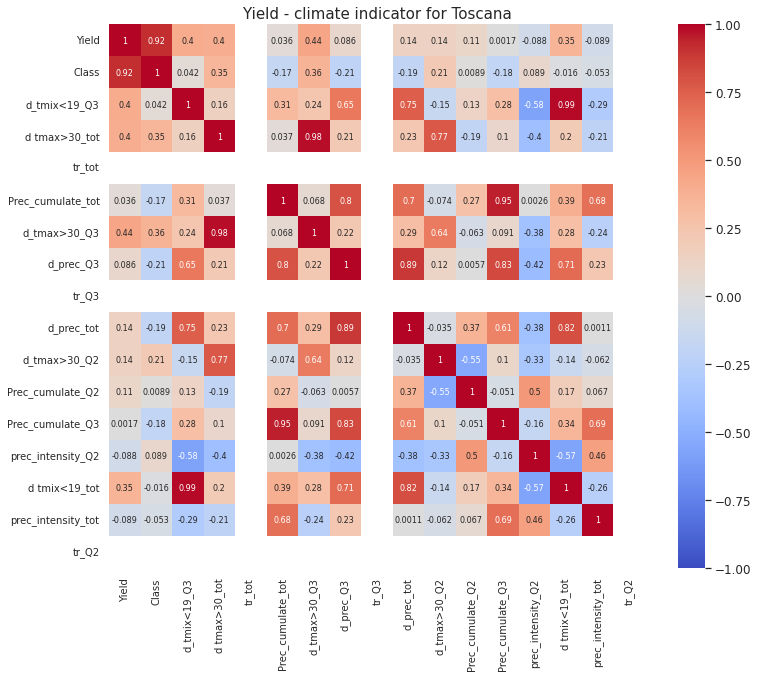

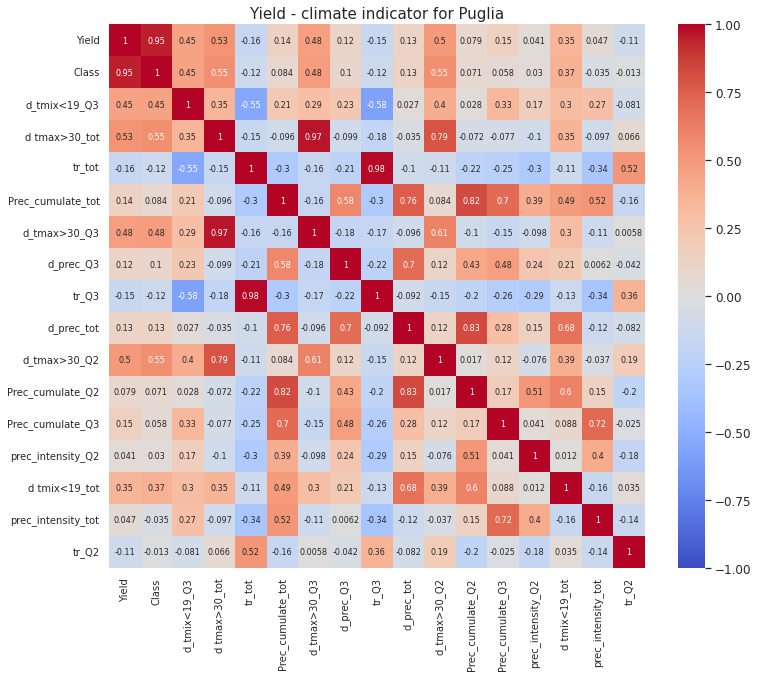

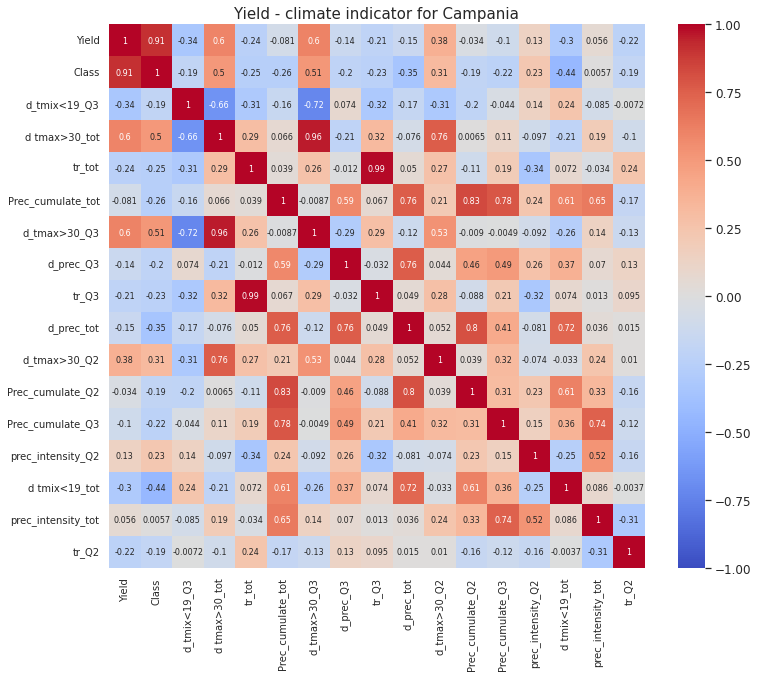

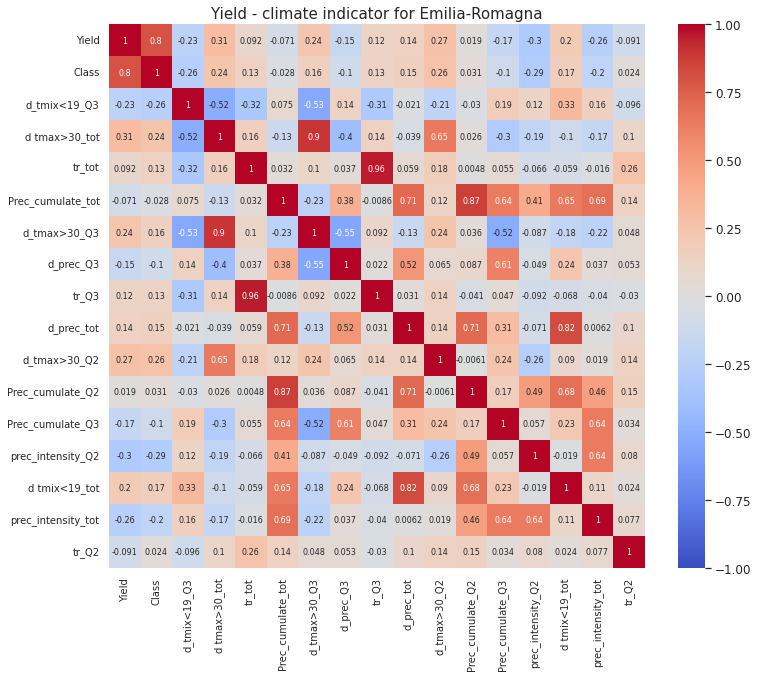

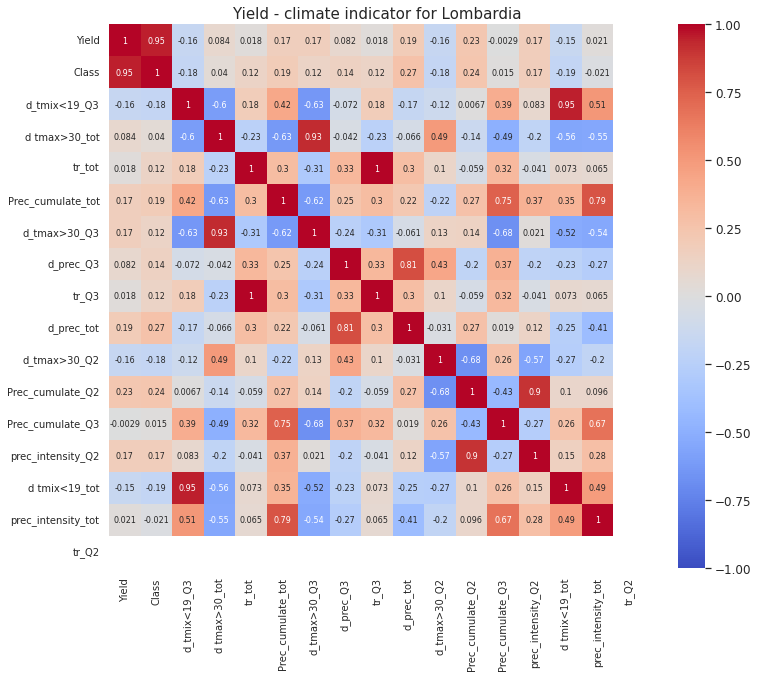

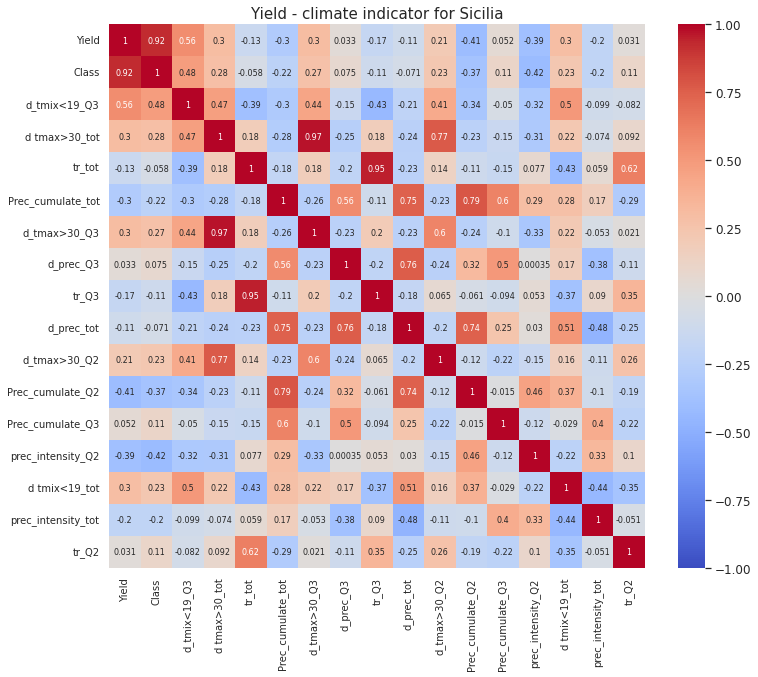

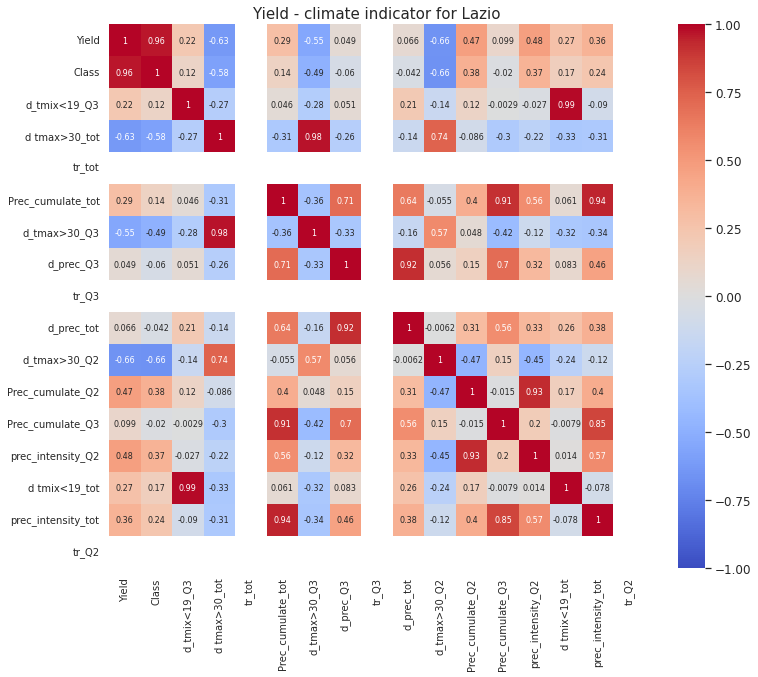

In [ ]:
#choose the most correlated indicators
more_correlated = ['d_tmix<19_Q3', 'd tmax>30_tot', 'tr_tot', 'Prec_cumulate_tot', 'd_tmax>30_Q3', 'd_prec_Q3',
                   'tr_Q3', 'd_prec_tot', 'd_tmax>30_Q2', 'Prec_cumulate_Q2', 'Prec_cumulate_Q3',
                   'prec_intensity_Q2', 'd tmix<19_tot', 'prec_intensity_tot', 'tr_Q2']

#define regions by provinces
regions = {
    'Toscana': ['Arezzo', 'Firenze', 'Livorno', 'Massa'],
    'Puglia': ['Bari', 'Barletta', 'Brindisi', 'Foggia', 'Lecce', 'Taranto'],
    'Campania': ['Benevento', 'Caserta', 'Napoli'],
    'Emilia-Romagna': ['Bologna', 'Ferrara', 'Forlì-Cesena', 'Modena', 'Parma', 'Piacenza'],
    'Lombardia': ['Brescia', 'Cremona', 'Lodi', 'Mantova', 'Milano', 'Pavia'],
    'Sicilia': ['Caltanissetta', 'Palermo', 'Ragusa', 'Trapani'],
    'Lazio': ['Frosinone', 'Latina', 'Viterbo']
}

#define coloumns to correlate
columns_to_include = ['Yield', 'Class'] + more_correlated

#________________________________________________

# funcion for heatmap
def create_heatmap(region_name, provinces, df):
    # sort by region
    df_region = df[df['Province'].isin(provinces)]

    # Select columns (more related indices)
    df_region_selected = df_region[columns_to_include].dropna()

    # calculate correlation
    df_corr = df_region_selected.corr(method='pearson')

    # heatmap setting
    plt.figure(figsize=(12, 10))
    heatmap = sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1, cmap="coolwarm", annot_kws={"size": 8})
    plt.title(f'Yield - climate indicator for {region_name}', fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Modifica la dimensione del carattere della legenda
    colorbar = heatmap.collections[0].colorbar
    colorbar.ax.tick_params(labelsize=12)

    plt.show()

#______________________________________________________

# Apply the duction 'create heatmap'
for region_name, provinces in regions.items():
    create_heatmap(region_name, provinces, df)


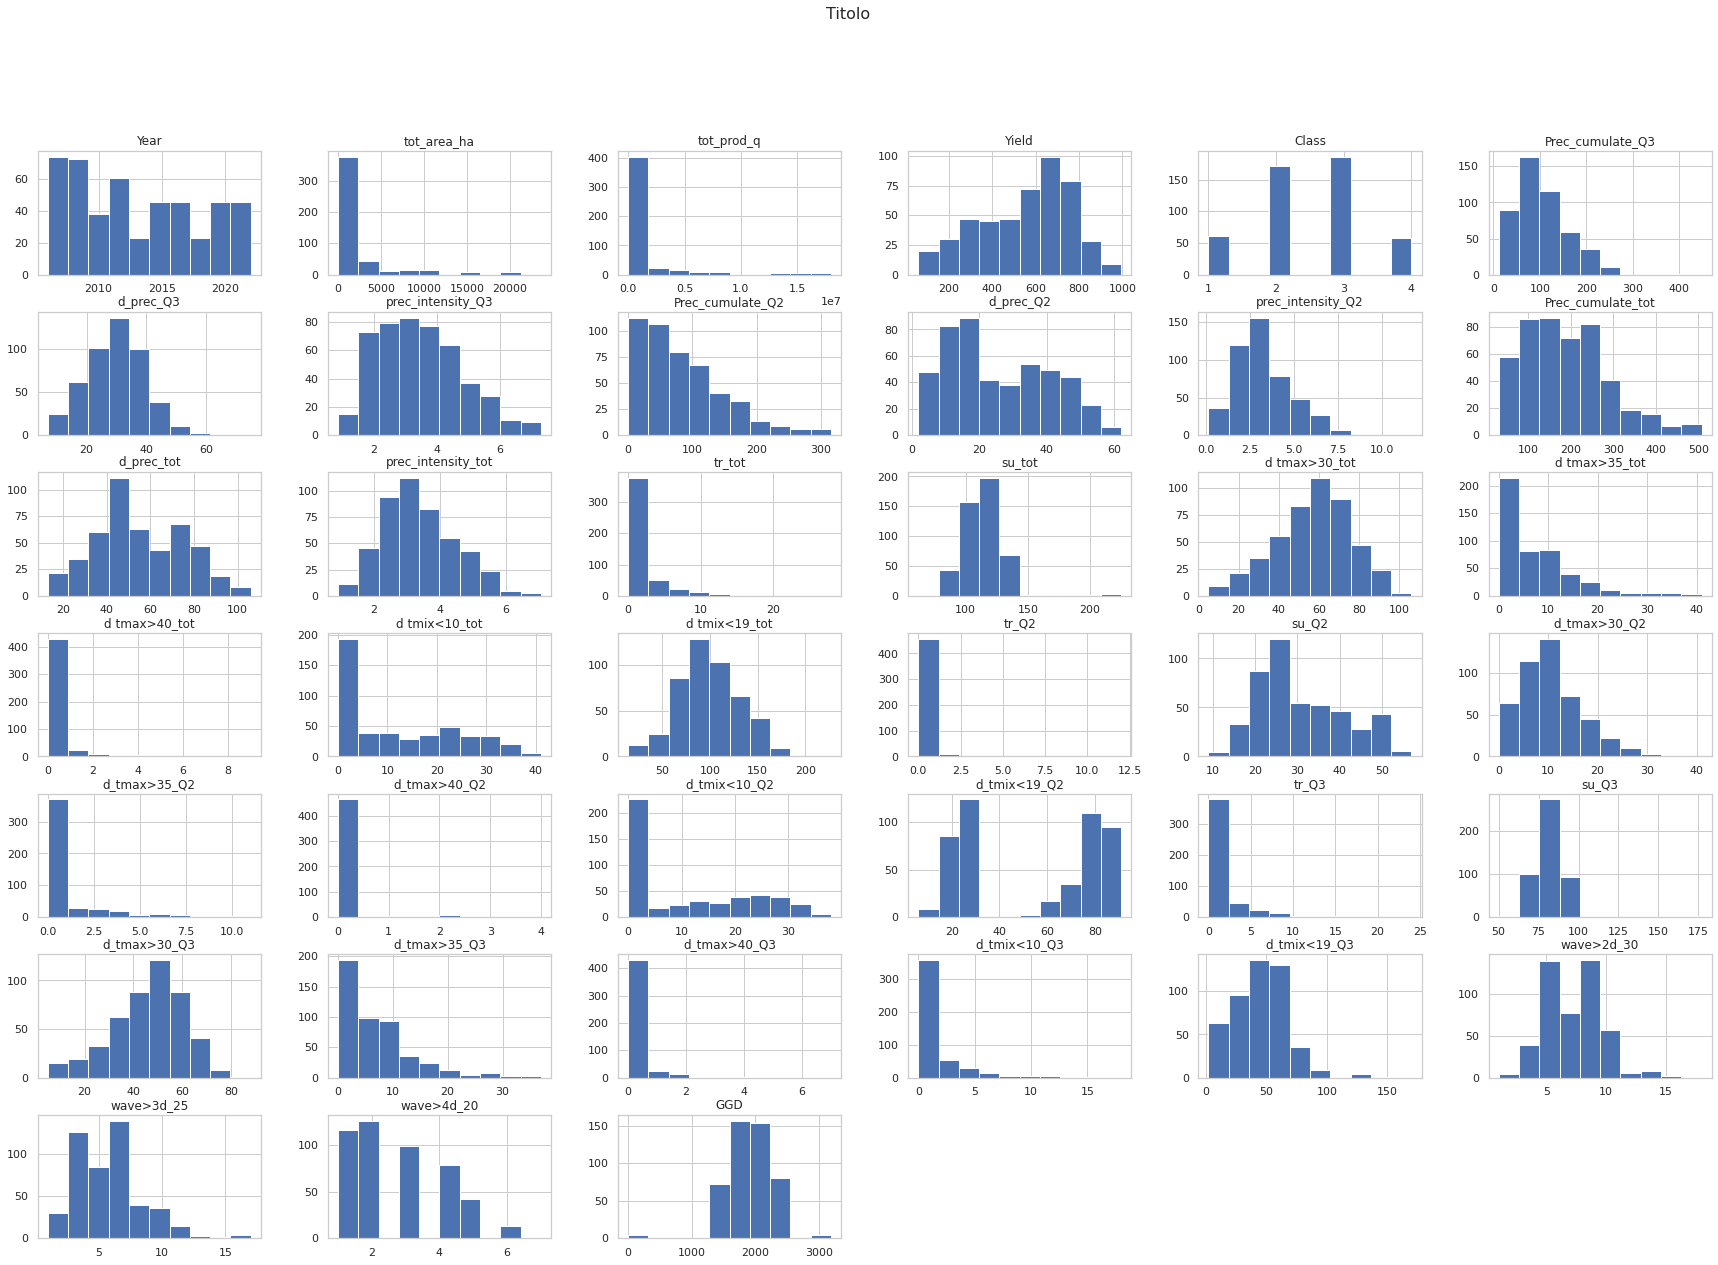

In [ ]:
##### Crea l'istogramma
df.hist(figsize=(30, 20))

# Modifica le dimensioni delle etichette degli assi e dei titoli
plt.xlabel('Etichetta asse X', fontsize=5)
plt.ylabel('Etichetta asse Y', fontsize=5)
plt.suptitle('Titolo', fontsize=16)

# Mostra il grafico
plt.show()

_________________________________________________________________________________________________________________________________

### Relation between climate condition and minimum and maximum yield

Dataset definition

In [ ]:
#Definition of the dataset with the 20 highest yields
yield_max = df.nlargest(20, 'Yield')
yield_max['Grade'] = 'max'

In [ ]:
#Definition of the dataset with the 20 lowest yields
yield_min = df.nsmallest(20, 'Yield')
yield_min['Grade'] = 'min'

In [ ]:
#concat the dataset for making some analysis
yield_min_max = pd.concat([yield_max, yield_min])

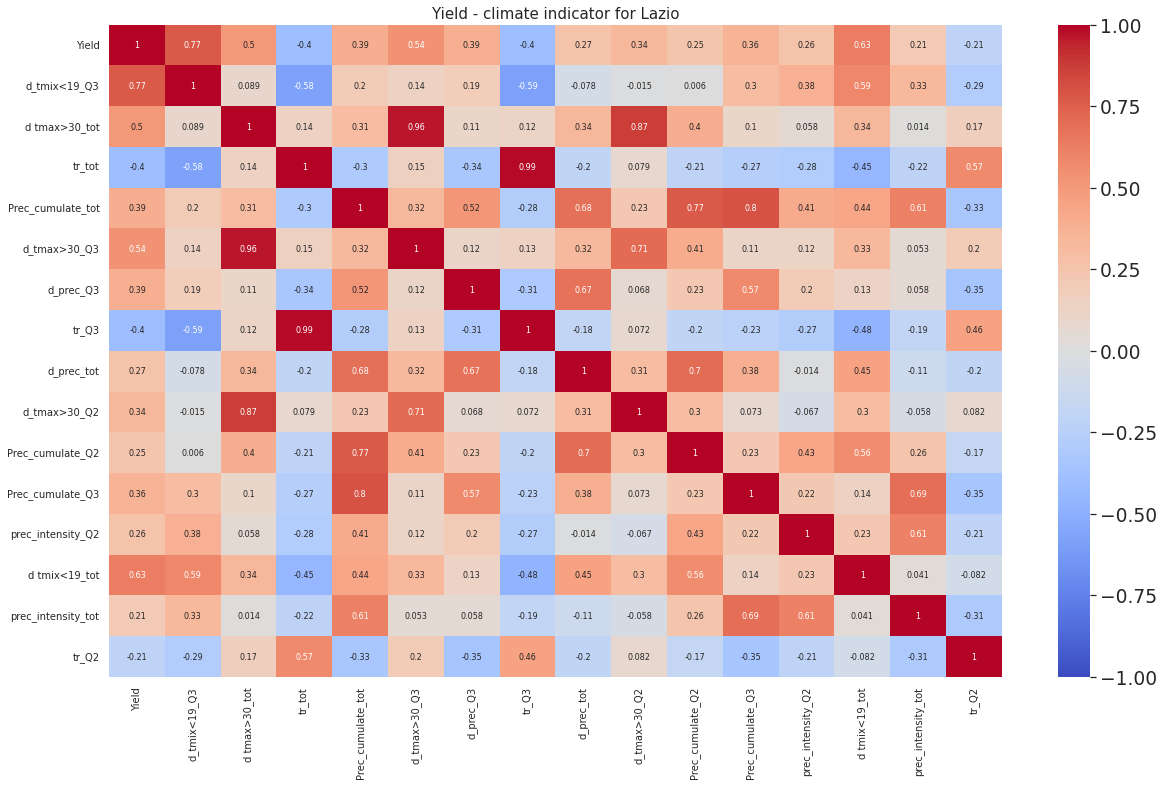

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))

columns_for_corr = ['Yield', 'd_tmix<19_Q3', 'd tmax>30_tot', 'tr_tot', 'Prec_cumulate_tot', 'd_tmax>30_Q3', 'd_prec_Q3',
                   'tr_Q3', 'd_prec_tot', 'd_tmax>30_Q2', 'Prec_cumulate_Q2', 'Prec_cumulate_Q3',
                   'prec_intensity_Q2', 'd tmix<19_tot', 'prec_intensity_tot', 'tr_Q2']

df_corr = yield_min_max[columns_for_corr].dropna().corr(method='pearson')

# heatmap setting
heatmap = sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1, cmap="coolwarm", annot_kws={"size": 8}, ax=ax)
ax.set_title(f'Yield - climate indicator for {region_name}', fontsize=15)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.show()


Dataset preparation and analysis

In [ ]:
# more related + 'Grade' indices list
indices = ['Yield', 'd_tmix<19_Q3', 'd tmax>30_tot', 'tr_tot', 'Prec_cumulate_tot', 'd_tmax>30_Q3', 'd_prec_Q3',
                   'tr_Q3', 'd_prec_tot', 'd_tmax>30_Q2', 'Prec_cumulate_Q2', 'Prec_cumulate_Q3',
                   'prec_intensity_Q2', 'd tmix<19_tot', 'prec_intensity_tot', 'tr_Q2', 'Grade'] #more related + 'Grade'
# dataset selection
ds_sel = yield_min_max[indices]

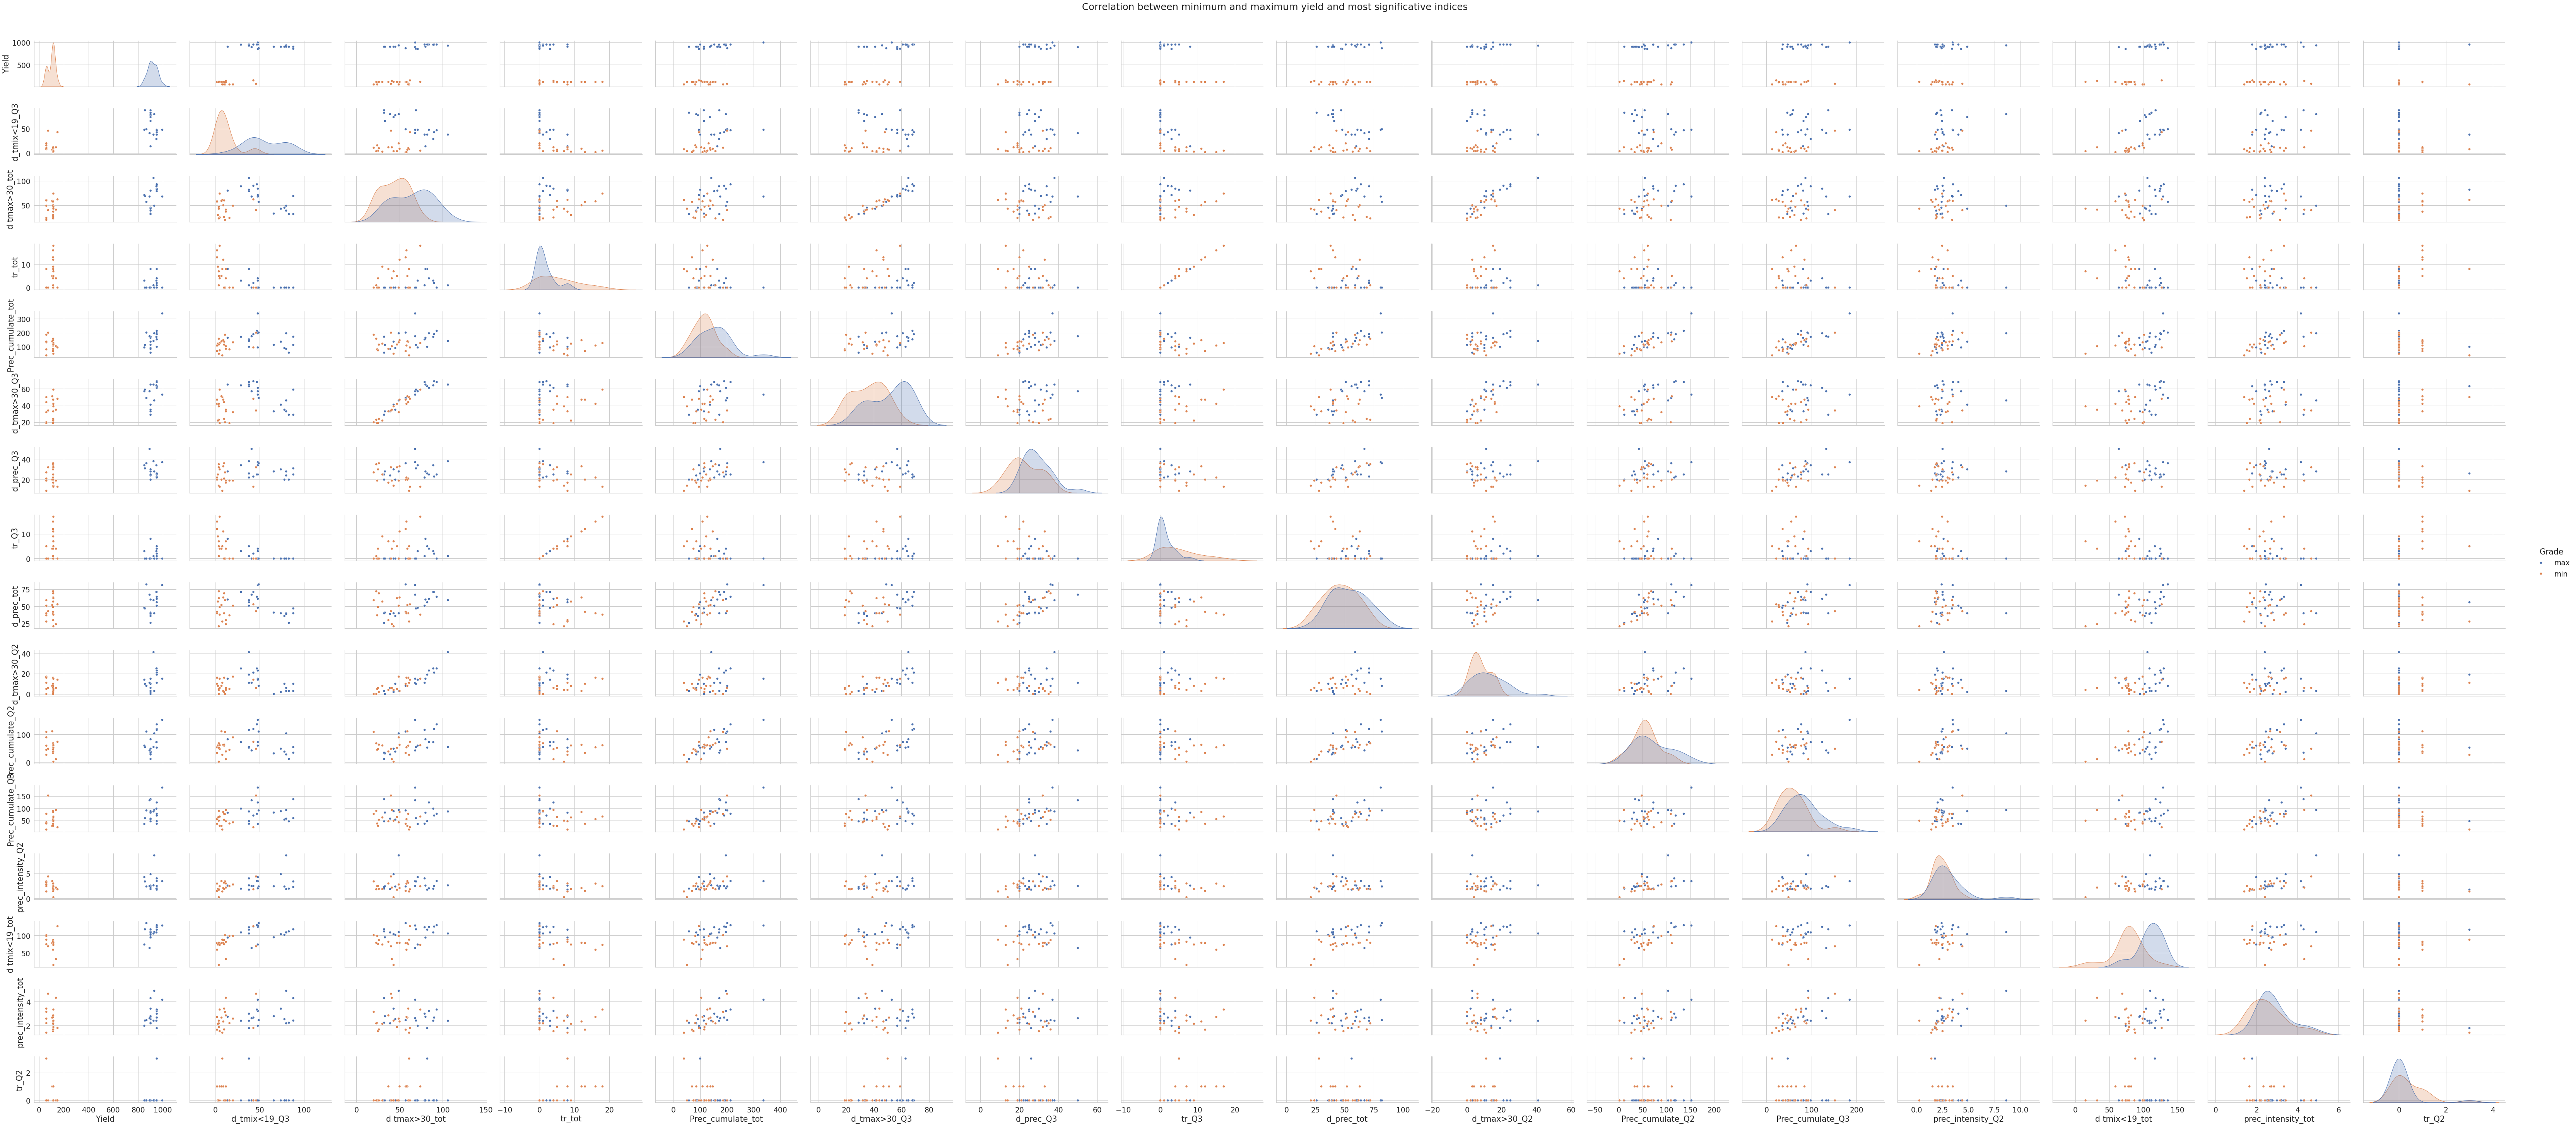

In [ ]:
# PAIRPLOT
pp = sns.set_context("notebook", font_scale=1.7, rc={"axes.titlesize": 18})
pp = sns.pairplot(ds_sel, hue="Grade", height=2.5, aspect=2.3)
pp =plt.suptitle("Correlation between minimum and maximum yield and most significative indices", y=1.02)